In [3]:
# load data
import pandas as pd
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'entity', 'sentiment', 'content']
df.head()

,ID,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# data exploration
print('\nDimension:', df.shape)
print("\nValue counts:\n", df['sentiment'].value_counts())
print('\nColumns:', df.columns)
print('\nRows:', df.index)
print('\nInformation:')
df.info()


Dimension: (74682, 4)

Value counts:
 sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Columns: Index(['ID', 'entity', 'sentiment', 'content'], dtype='object')

Rows: RangeIndex(start=0, stop=74682, step=1)

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
# missing values
df.isna().sum()

ID             0
entity         0
sentiment      0
content      686
dtype: int64

In [8]:
# Drop rows where 'content' is missing
df = df.dropna(subset=['content'])

In [13]:
# Download stopwords only once
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
# Define cleaning function safely
def clean_tweet(text):
    try:
        text = re.sub(r"http\S+", "", str(text))
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        text = text.lower()
        text = " ".join([word for word in text.split() if word not in stop_words])
        return text
    except:
        return ""

# Apply cleaning
df['cleaned'] = df['content'].apply(clean_tweet)

C:\Users\HP\AppData\Local\Temp\ipykernel_19220\4115600400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


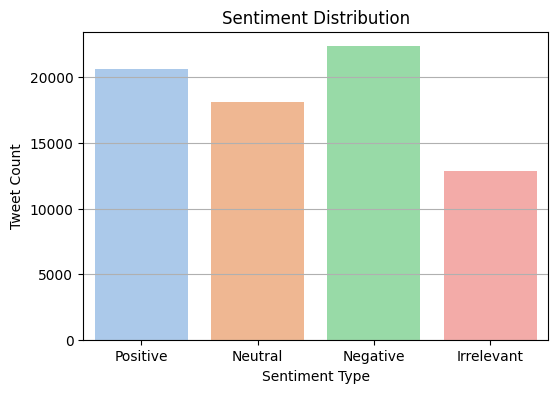

In [15]:
# sentiment distribution visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Tweet Count")
plt.grid(axis='y')
plt.show()

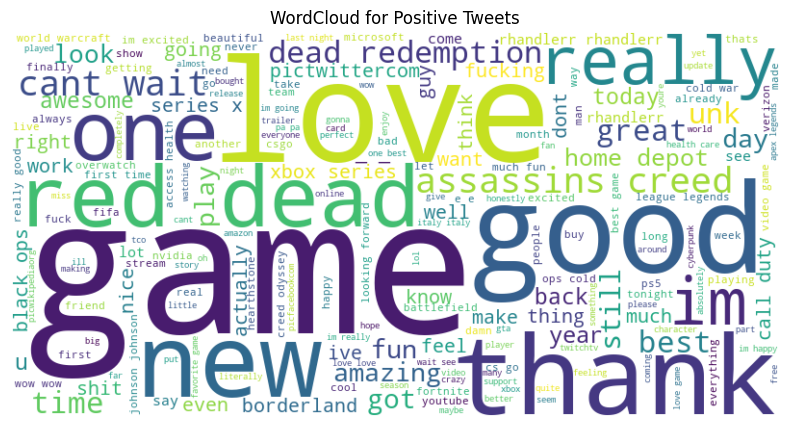

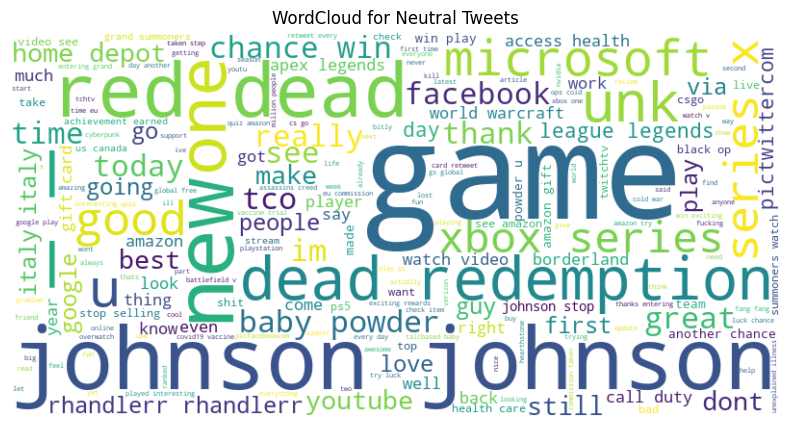

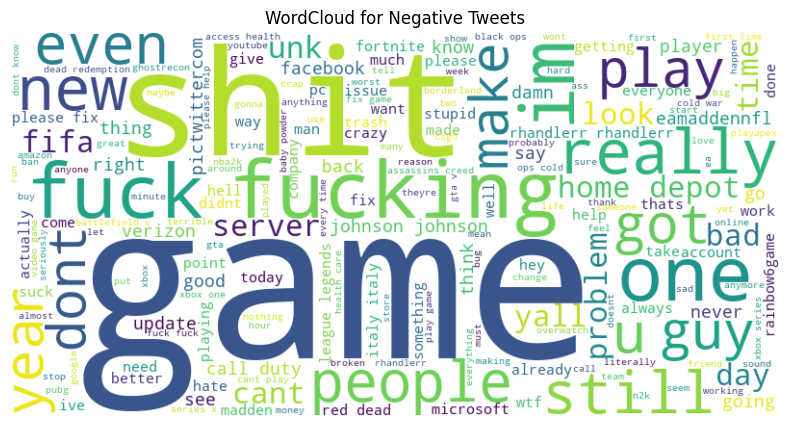

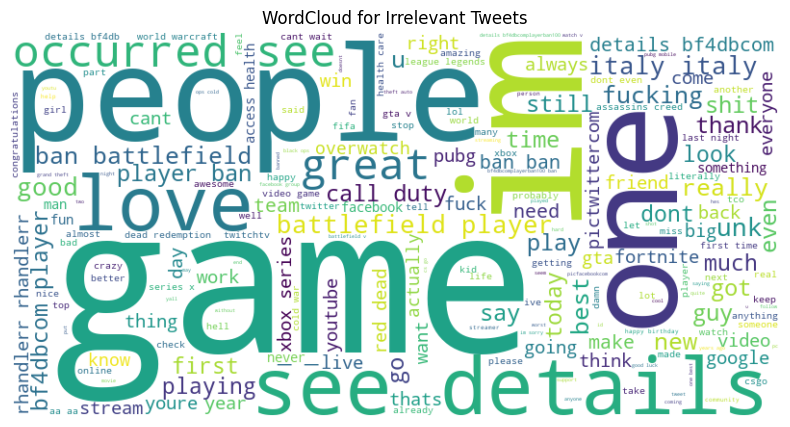

In [17]:
# visualization of word cloud
from wordcloud import WordCloud
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()